In [29]:
import json
import pandas as pd
import matplotlib.pyplot as plt
#director= json.load(open("SG_info_CCOL_VER_TESTING_20190115_12_1hours(31).txt", 'rb'))
ccol=json.load(open("CCOL.txt", 'rb'))
t035=json.load(open("T035.txt", 'rb'))
org=json.load(open("ORG_Retrained_Full.txt", 'rb'))
#org_new=json.load(open("SG_info_CCOL_VER_TESTING_20190115_12_1hours(52).txt", 'rb'))
approaches= {'328':['1','2'],'334':['3','4'],'339':['5','6']}

In [73]:
ccol['352']['10'].keys()

dict_keys(['duration_red', 'overstaancounter', 'redlightcrossingcounter', 'wait_time_this_interval_summed', 'realisationcounter', 'onnodige_wachttijd_SG', 'deepyellowcrossingcounter', 'duration_cycle', 'stopcounter'])

In [30]:
df = pd.DataFrame(columns=['CCOL_Waiting','T035_Waiting','DIRECTOR_Waiting',
                          'CCOL_Stops','T035_Stops','DIRECTOR_Stops'])
for mainkey in approaches.keys():
    for lane in approaches[mainkey]:
        df = df.append({'CCOL_Waiting':sum(ccol[mainkey][lane]['onnodige_wachttijd_SG']),                     
                        'T035_Waiting':sum(t035[mainkey][lane]['onnodige_wachttijd_SG']),
                        'DIRECTOR_Waiting':sum(org[mainkey][lane]['onnodige_wachttijd_SG']),
                        'CCOL_Stops':sum(ccol[mainkey][lane]['stopcounter']),
                        'T035_Stops':sum(t035[mainkey][lane]['stopcounter']),
                        'DIRECTOR_Stops':sum(org[mainkey][lane]['stopcounter']),}, ignore_index=True)

In [13]:
print(df.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  CCOL\_Waiting &  T035\_Waiting &  DIRECTOR\_Waiting &  CCOL\_Stops &  T035\_Stops &  DIRECTOR\_Stops \\
\midrule
0 &           0.0 &          10.3 &             230.2 &       175.0 &       162.0 &           156.0 \\
1 &         139.7 &         355.4 &             628.9 &       230.0 &       219.0 &           205.0 \\
2 &          55.3 &         137.7 &             305.9 &       186.0 &       171.0 &           172.0 \\
3 &          34.6 &         401.5 &             482.1 &       235.0 &       192.0 &           187.0 \\
4 &          83.0 &         285.5 &             635.9 &       192.0 &       219.0 &           197.0 \\
5 &           0.0 &         140.1 &             373.1 &       225.0 &       201.0 &           202.0 \\
\bottomrule
\end{tabular}



In [31]:
df.describe()

,CCOL_Waiting,T035_Waiting,DIRECTOR_Waiting,CCOL_Stops,T035_Stops,DIRECTOR_Stops
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,52.100000,221.750000,442.683333,207.166667,194.000000,186.500000
std,53.616938,150.119069,168.679393,25.794702,23.899791,19.149413
min,0.000000,10.300000,230.200000,175.000000,162.000000,156.000000
25%,8.650000,138.300000,322.700000,187.500000,176.250000,175.750000
50%,44.950000,212.800000,427.600000,208.500000,196.500000,192.000000
75%,76.075000,337.925000,592.200000,228.750000,214.500000,200.750000
max,139.700000,401.500000,635.900000,235.000000,219.000000,205.000000


In [54]:
df.to_clipboard()

In [92]:
waiting = pd.DataFrame()
stops = pd.DataFrame()
models = {"CCOL":ccol,"T035":t035,"Original":org}
for mainkey in approaches.keys():
    for lane in approaches[mainkey]:
        for model in models.keys():
            waiting[model+"_"+mainkey+"_"+lane+"_Wait"] = models[model][mainkey][lane]['onnodige_wachttijd_SG']
            stops[model+"_"+mainkey+"_"+lane+"_Stops"] = models[model][mainkey][lane]['stopcounter']

waiting['CCOL'] = waiting[['CCOL_328_1_Wait','CCOL_328_2_Wait','CCOL_334_3_Wait','CCOL_334_4_Wait','CCOL_339_5_Wait','CCOL_339_6_Wait']].sum(axis=1)
waiting['DIRECTOR + FPD-LOF'] = waiting[['T035_328_1_Wait','T035_328_2_Wait','T035_334_3_Wait','T035_334_4_Wait','T035_339_5_Wait','T035_339_6_Wait']].sum(axis=1)
waiting['DIRECTOR'] = waiting[['Original_328_1_Wait','Original_328_2_Wait','Original_334_3_Wait','Original_334_4_Wait','Original_339_5_Wait','Original_339_6_Wait']].sum(axis=1)

stops['CCOL'] = stops[['CCOL_328_1_Stops','CCOL_328_2_Stops','CCOL_334_3_Stops','CCOL_334_4_Stops','CCOL_339_5_Stops','CCOL_339_6_Stops']].sum(axis=1)
stops['DIRECTOR + FPD-LOF'] = stops[['T035_328_1_Stops','T035_328_2_Stops','T035_334_3_Stops','T035_334_4_Stops','T035_339_5_Stops','T035_339_6_Stops']].sum(axis=1)
stops['DIRECTOR'] = stops[['Original_328_1_Stops','Original_328_2_Stops','Original_334_3_Stops','Original_334_4_Stops','Original_339_5_Stops','Original_339_6_Stops']].sum(axis=1)
waiting['timestamp']=(pd.date_range(start="2019-01-07 15:00:00", end="2019-01-07 17:59:00",freq="min"))    
stops['timestamp']=(pd.date_range(start="2019-01-07 15:00:00", end="2019-01-07 17:59:00",freq="min"))    

In [53]:
waiting.dtypes

CCOL_328_1_Wait               float64
T035_328_1_Wait               float64
Original_328_1_Wait           float64
CCOL_328_2_Wait               float64
T035_328_2_Wait               float64
Original_328_2_Wait           float64
CCOL_334_3_Wait               float64
T035_334_3_Wait               float64
Original_334_3_Wait           float64
CCOL_334_4_Wait               float64
T035_334_4_Wait               float64
Original_334_4_Wait           float64
CCOL_339_5_Wait               float64
T035_339_5_Wait               float64
Original_339_5_Wait           float64
CCOL_339_6_Wait               float64
T035_339_6_Wait               float64
Original_339_6_Wait           float64
CCOL_avg                      float64
T035_avg                      float64
Original_avg                  float64
timestamp              datetime64[ns]
dtype: object

In [93]:
w5=waiting.groupby(pd.Grouper(key='timestamp', freq="3min")).sum()
s5=stops.groupby(pd.Grouper(key='timestamp', freq="3min")).sum()

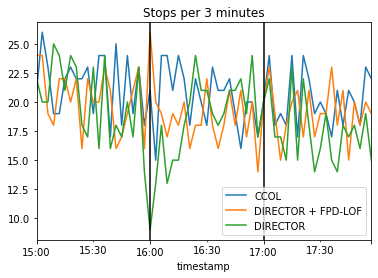

In [80]:
s5[['CCOL','DIRECTOR + FPD-LOF','DIRECTOR']].plot()
plt.title('Stops per 3 minutes')
plt.axvline("2019-01-07 16:00:00", color='black')
plt.axvline("2019-01-07 17:00:00", color='black')

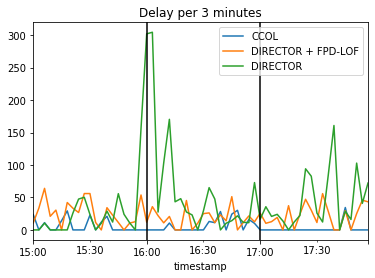

In [81]:
w5[['CCOL','DIRECTOR + FPD-LOF','DIRECTOR']].plot()
plt.title('Delay per 3 minutes')
plt.axvline("2019-01-07 16:00:00", color='black')
plt.axvline("2019-01-07 17:00:00", color='black')

In [95]:
ranges=[0,20,40,60]
mods=['CCOL','DIRECTOR + FPD-LOF','DIRECTOR']
for i in range(1,len(ranges)):
    tmp_stops =s5.iloc[ranges[i-1]:ranges[i]]
    tmp_wait =w5.iloc[ranges[i-1]:ranges[i]]
    for mod in mods:
        print(mod)
        print(tmp_wait[mod].mean())
        print(tmp_stops[mod].mean())

    

CCOL
6.715000000000008
21.55
DIRECTOR + FPD-LOF
26.54999999999999
20.25
DIRECTOR
22.809999999999977
20.1
CCOL
7.190000000000055
20.4
DIRECTOR + FPD-LOF
17.649999999999817
18.8
DIRECTOR
66.67499999999981
18.35
CCOL
1.725
20.2
DIRECTOR + FPD-LOF
22.32500000000018
19.15
DIRECTOR
43.319999999999574
17.5


In [109]:
ap1cols3=[]
ap1cols4=[]
for col in w5.columns:
    if "334" in col:
        if col[-6]=='3':
            ap1cols3.append(col)
        if col[-6]=='4':
            ap1cols4.append(col)

wap1_3=w5[ap1cols3]
wap1_4=w5[ap1cols4]
ap1cols3=[]
ap1cols4=[]
for col in s5.columns:
    if "334" in col:
        if col[-7]=='3':
            ap1cols3.append(col)
        if col[-7]=='4':
            ap1cols4.append(col)
sap1_3=s5[ap1cols3]
sap1_4=s5[ap1cols4]

In [110]:
wap1_3.columns=['CCOL','DIRECTOR + FPD-LOF','DIRECTOR']
wap1_4.columns=['CCOL','DIRECTOR + FPD-LOF','DIRECTOR']
sap1_3.columns=['CCOL','DIRECTOR + FPD-LOF','DIRECTOR']
sap1_4.columns=['CCOL','DIRECTOR + FPD-LOF','DIRECTOR']

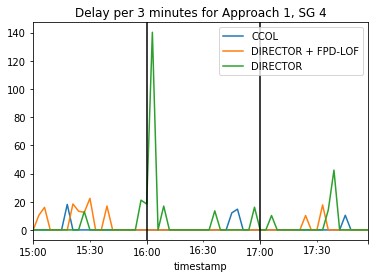

In [114]:
wap1_3.plot()

plt.title('Delay per 3 minutes for Approach 1, SG 4')
plt.axvline("2019-01-07 16:00:00", color='black')
plt.axvline("2019-01-07 17:00:00", color='black')

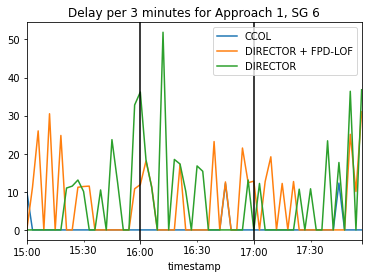

In [113]:
wap1_4.plot()
plt.title('Delay per 3 minutes for Approach 1, SG 6')
plt.axvline("2019-01-07 16:00:00", color='black')
plt.axvline("2019-01-07 17:00:00", color='black')